In [10]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os
import seaborn as sns# for ploting 
from sklearn.model_selection import train_test_split #for spliting 
from sklearn.ensemble import RandomForestClassifier#for algorithem
from sklearn.metrics import accuracy_score#for checking accuracy

In [3]:
df1=pd.read_csv('Normal_Bearing.csv')
df2=pd.read_csv('outer_race_fault_test_2.csv')
df3=pd.read_csv('outer_race_fault_test_3.csv')
df4=pd.read_csv('inner_race_fault.csv')
df5=pd.read_csv('roller_element_fault.csv')
# read all the file means load all this files 
df = pd.concat([df1,df2,df3,df4,df5])# now add all this file and name it to df
df = df.reset_index(drop=True)#index ko drop kar do
df


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,Normal
1,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
2,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
3,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
4,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
...,...,...,...,...,...,...,...,...,...,...
2273,0.229,-0.488,-0.118015,0.083851,0.144769,-0.067698,0.233650,1.581825,-1.226706,Roller Element
2274,0.303,-0.569,-0.117486,0.082563,0.143595,-0.005831,0.369785,2.110106,-1.222223,Roller Element
2275,0.232,-0.569,-0.116743,0.084937,0.144371,-0.041197,0.247918,1.606971,-1.236654,Roller Element
2276,0.293,-0.771,-0.117529,0.083075,0.143924,-0.024656,0.533415,2.035792,-1.224588,Roller Element


In [6]:
df.replace({'Fault':{'Normal':0,'Outer Race':1,'Inner Race':2,'Roller Element':3}},inplace=True)# we dont want strings so convert it

In [7]:
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,0
1,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,0
2,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,0
3,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,0
4,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,0
...,...,...,...,...,...,...,...,...,...,...
2273,0.229,-0.488,-0.118015,0.083851,0.144769,-0.067698,0.233650,1.581825,-1.226706,3
2274,0.303,-0.569,-0.117486,0.082563,0.143595,-0.005831,0.369785,2.110106,-1.222223,3
2275,0.232,-0.569,-0.116743,0.084937,0.144371,-0.041197,0.247918,1.606971,-1.236654,3
2276,0.293,-0.771,-0.117529,0.083075,0.143924,-0.024656,0.533415,2.035792,-1.224588,3


In [8]:
correlation =df.corr() # correlate all the feature

<Axes: >

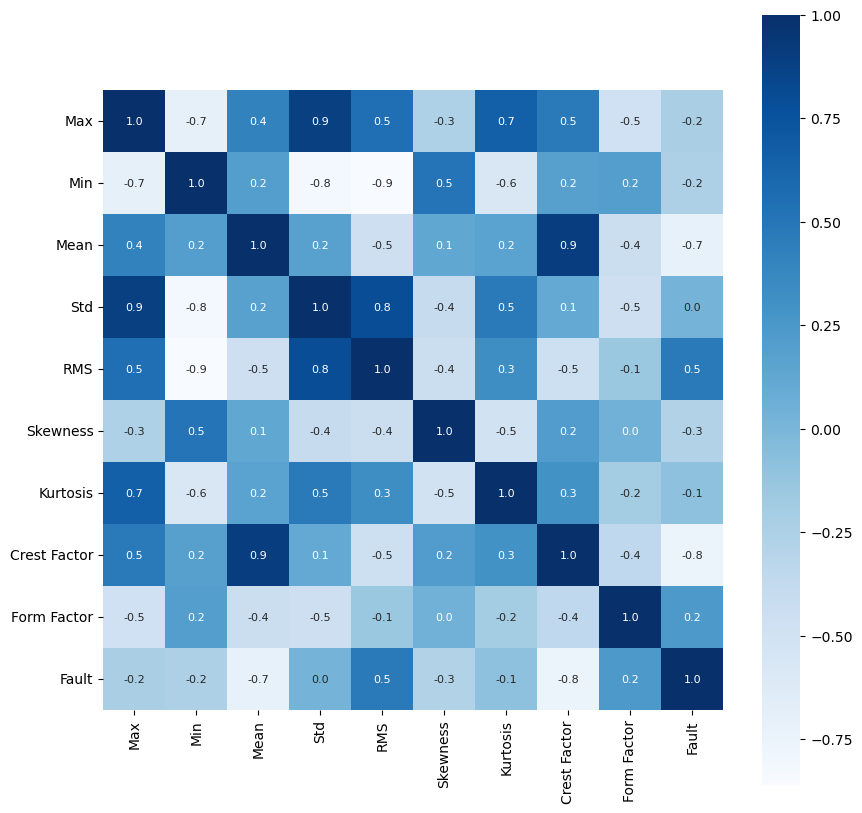

In [12]:
plt.figure(figsize=(10,10))#plot it to 10/10 fig 
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')#make the heat mape

In [16]:
#seprate data and target
X = df.iloc[:,:-1]#exept last colume 
Y = df.iloc[:,-1]# only last colume 

In [17]:
print(X)

        Max    Min      Mean       Std       RMS  Skewness  Kurtosis  \
0     0.398 -0.625 -0.117085  0.093069  0.149567 -0.012753  0.931376   
1     0.422 -0.657 -0.117744  0.093095  0.150100 -0.033307  0.876667   
2     0.466 -0.605 -0.116695  0.091405  0.148230  0.022064  0.946745   
3     0.356 -0.713 -0.117174  0.094340  0.150430 -0.088984  0.858388   
4     0.500 -0.647 -0.117876  0.093033  0.150165 -0.036459  0.957214   
...     ...    ...       ...       ...       ...       ...       ...   
2273  0.229 -0.488 -0.118015  0.083851  0.144769 -0.067698  0.233650   
2274  0.303 -0.569 -0.117486  0.082563  0.143595 -0.005831  0.369785   
2275  0.232 -0.569 -0.116743  0.084937  0.144371 -0.041197  0.247918   
2276  0.293 -0.771 -0.117529  0.083075  0.143924 -0.024656  0.533415   
2277  0.227 -0.537 -0.117737  0.082736  0.143899 -0.019219  0.263400   

      Crest Factor  Form Factor  
0         2.661008    -1.277421  
1         2.811460    -1.274798  
2         3.143757    -1.270240  

In [18]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
2273    3
2274    3
2275    3
2276    3
2277    3
Name: Fault, Length: 2278, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) # seprate test train data

In [20]:
print(Y.shape, Y_train.shape, Y_test.shape)#just see the number of rows

(2278,) (1822,) (456,)


In [21]:
model = RandomForestClassifier()#load the model

In [22]:
model.fit(X_train, Y_train)# fit it to train data

RandomForestClassifier()

In [23]:
X_test_prediction = model.predict(X_test)#predict for test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)#find the accuray of the prediction

In [24]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9605263157894737


In [30]:
input_data = (0.415,-0.322,-0.0018599121093749,0.0764453967285313,0.0764661533452669,0.0028535655331329,0.3502194854518827,5.427237828038169,-41.11277783494964)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Normal condition')
elif (prediction[0]==1):
  print('Outer Race Condition')
elif (prediction[0]==2):
  print('Inner Race condition')
else:
  print('Roller Race condition')

[0]
Normal condition


C:\Users\sujal\OneDrive\Desktop\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
